# Project: Titanic

**In this project we will manipulate a dataset regarding the passengers of the Titanic. We will look for a reliable dataset, we will clean it, explore it, and finally train a prediction model on it to see what we can find out.**

## 1. The Dataset

### 1.1. The Source

In order to have a reliable result, we must have a reliable dataset. Thus, we will use a complete dataset taken from: https://www.kaggle.com/pavlofesenko/titanic-extended. The bad part of using a unaltered dataset is that we will have a lot of cleaning to do, but if done right, this will provide us with a dataset tailored for our needs.

### 1.2. Exploring the Data - Exploratory Data Analysis

For the sake of exploring the data, the 'full.csv' file will be used, in order to build a complete picture of the information presented.


**First, we declare the library we will need along the project:**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
%matplotlib inline

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

**Now we read the .csv file into a dataframe and display it:**

In [4]:
df_full = pd.read_csv('./data/kaggle/full.csv')
df_full.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0


**We create a working copy of the imported DataFrame, and display it:**

In [5]:
df = df_full.copy()
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0


**We look into the dataframe to have a starting point for our exploratory data analysis:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


**General ideas**:
 * 891 people were registered as survivors or victims, the others are missing
 * most of the people were in the 3rd class, while the 1st class does not cover even an entire quantile
 * the passengers were mostly young, the youngest being a baby of approx. 3 months(which was the last living survivor of the Titanic)
 * roughly half of the passengers were accompanied by siblings or spouses
 * the smallest fare price is a little bit above 15% of the price of the most expensive

Below we have the data on the no. of survivors:

In [8]:
survived = sum(df['Survived']==1)
victim = sum(df['Survived']==0)
sur = [survived, victim]
survival = pd.DataFrame(data = sur, 
                        index=['survived','victim'],
                        columns=['No. of passengers'])
df.rename(columns={0:'No.'}, inplace=True)
survival

,No. of passengers
survived,342
victim,549


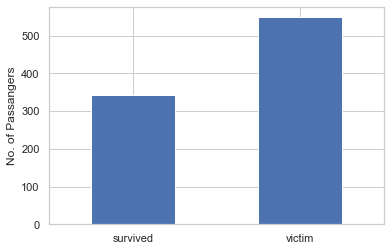

In [9]:
sns.set_theme(style="whitegrid")
survival.plot.bar(legend=False)
plt.xticks(rotation=0)
plt.ylabel('No. of Passangers');

In [10]:
df_cat = df.groupby(['Sex','Pclass','Survived'])['PassengerId'].count()
df_cat

Sex     Pclass  Survived
female  1       0.0           3
                1.0          91
        2       0.0           6
                1.0          70
        3       0.0          72
                1.0          72
male    1       0.0          77
                1.0          45
        2       0.0          91
                1.0          17
        3       0.0         300
                1.0          47
Name: PassengerId, dtype: int64

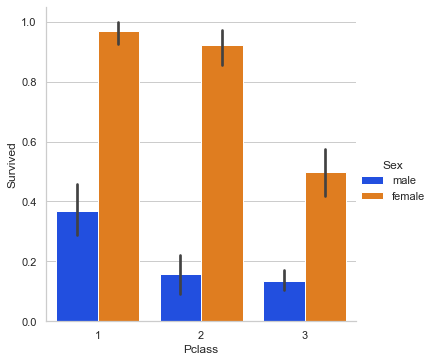

In [11]:
sns.set_theme(style="whitegrid")
sns.catplot(x="Pclass",
               y="Survived",
               hue="Sex",
               data=df, 
               kind="bar",
               palette="bright");

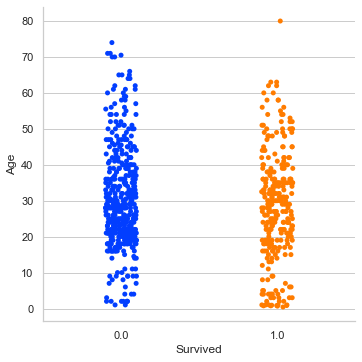

In [12]:
sns.set_theme(style="whitegrid")
sns.catplot(x="Survived", 
            y='Age', 
            data = df,
            palette='bright');

<AxesSubplot:title={'center':'Number of Victims by Age'}, xlabel='Age', ylabel='Count'>

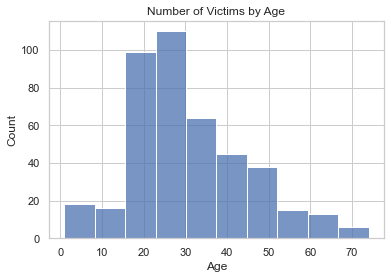

In [13]:
plt.title('Number of Victims by Age')
sns.set_theme(style="whitegrid")
sns.histplot(x='Age', 
             data=df[df['Survived']==0], 
             bins=10)

<AxesSubplot:title={'center':'Number of Survivors by Age'}, xlabel='Age', ylabel='Count'>

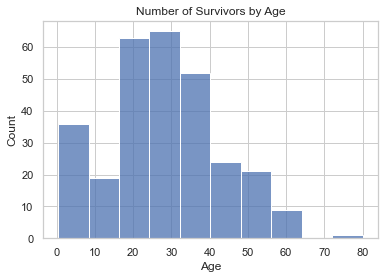

In [14]:
plt.title('Number of Survivors by Age')
sns.set_theme(style="whitegrid")
sns.histplot(x='Age', 
             data=df[df['Survived']==1], 
             bins=10)

### 1.3. Data Cleaning & Feature Engineering

_**Before deciding which changes would be made, some column inspection took place, using the .unique() method**_

In [15]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0


**The following columns/features will be removed:**
   * 0 PassengerId: Doesn't have any statistical value in our analysis
   * 3 Name: Same as above, so it is useless for us
   * 8 Ticket: Useless data
   * 9 Fare: It is redundant since we have a more specific measure of conditions aboard, namely 'Pclass'
   * 11 Embarked: Because the column 16 'Boarded' already depicts the same info in a more precise manner
   * 12 WikiId: Irrelevant data
   * 13 Name_wiki: Redundant & useless data
   * 15 Hometown: Irrelevant data
   * 17 Destination: Irrelevant data; pun intended(...too soon?)
   * 19 Body: Irrelevant data
   * 20 Class: Redundant data; we already have 'Pclass'

In [16]:
df = df.drop(['PassengerId','Name','Ticket','Fare','Embarked','WikiId','Name_wiki','Hometown','Destination','Body','Class'], axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Age_wiki,Boarded,Lifeboat
0,0.0,3,male,22.0,1,0,NaN,22.0,Southampton,NaN
1,1.0,1,female,38.0,1,0,C85,35.0,Cherbourg,4


__***__

The 'Boarded' column is kept because there may be a link between the city of boarding and the position on the ship, which may have saved ones, and doomed others. More info here:
https://www.denverpost.com/2012/03/18/map-of-the-titanics-maiden-and-final-voyage/

The column 'Lifeboat' may be useful in helping assess the situation, but first the 'NaN' values will be replaced with 0, while the others with 1.

The column 'Cabin' is also considered, because it may have a relation with some passangers' position on the ship as well. The same principle of 0 and 1 will be executed, depending on whether a passenger was assigned to a cabin or not.


__***__

**The following rows/observations will be removed:**
   * 1 Survived: All the rows containing 'NaN' as value

In [17]:
df = df.dropna(how='any',
               subset=['Survived'])
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Age_wiki,Boarded,Lifeboat
0,0.0,3,male,22.0,1,0,NaN,22.0,Southampton,NaN
1,1.0,1,female,38.0,1,0,C85,35.0,Cherbourg,4


**The Age Columns**

Right now we have 2 columns for age. That is because the first one, which is more trustworthy, has a lot of missing values, while the other one has a higher degree of completeness. We will replace the 'NaN' values of the first with the ones of the latter. In case we have any other 'NaN's left after this process, we will replace them with the median of the rest of the column. This way we can reach a higher degree of accuracy in our dataframe.

In [18]:
df['Age'].isna().sum()

177

In [19]:
df['Age_wiki'].isna().sum()

4

We have only 4 missing values in 'Age_wiki', unlike 'Age' that has 177.

In [20]:
df[df['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Age_wiki,Boarded,Lifeboat
5,0.0,3,male,NaN,0,0,NaN,22.0,Queenstown,NaN
17,1.0,2,male,NaN,0,0,NaN,23.0,Southampton,14
19,1.0,3,female,NaN,0,0,NaN,22.0,Cherbourg,C
26,0.0,3,male,NaN,0,0,NaN,25.0,Cherbourg,NaN
28,1.0,3,female,NaN,0,0,NaN,25.0,Queenstown,?
...,...,...,...,...,...,...,...,...,...,...
859,0.0,3,male,NaN,0,0,NaN,30.0,Cherbourg,NaN
863,0.0,3,female,NaN,8,2,NaN,14.0,Southampton,NaN
868,0.0,3,male,NaN,0,0,NaN,23.0,Southampton,NaN
878,0.0,3,male,NaN,0,0,NaN,23.0,Southampton,NaN


In [21]:
df[df['Age_wiki'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Age_wiki,Boarded,Lifeboat
42,0.0,3,male,NaN,0,0,NaN,NaN,Cherbourg,NaN
347,1.0,3,female,NaN,1,0,NaN,NaN,NaN,NaN
420,0.0,3,male,NaN,0,0,NaN,NaN,Cherbourg,NaN
557,0.0,1,male,NaN,0,0,NaN,NaN,NaN,NaN


Bad luck on our side because the missing values in 'Age_wiki' are also missing in 'Age'. We will need for sure to do the median to replace the last 4 'NaN's.

In [22]:
df['Age2']=df['Age'].mask(pd.isnull, df['Age_wiki'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Age_wiki,Boarded,Lifeboat,Age2
0,0.0,3,male,22.0,1,0,NaN,22.0,Southampton,NaN,22.0
1,1.0,1,female,38.0,1,0,C85,35.0,Cherbourg,4,38.0
2,1.0,3,female,26.0,0,0,NaN,26.0,Southampton,14?,26.0
3,1.0,1,female,35.0,1,0,C123,35.0,Southampton,D,35.0
4,0.0,3,male,35.0,0,0,NaN,35.0,Southampton,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,27.0,0,0,NaN,27.0,Southampton,NaN,27.0
887,1.0,1,female,19.0,0,0,B42,19.0,Southampton,3,19.0
888,0.0,3,female,NaN,1,2,NaN,7.0,Southampton,NaN,7.0
889,1.0,1,male,26.0,0,0,C148,26.0,Cherbourg,5,26.0


In [23]:
df[df['Age2'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Age_wiki,Boarded,Lifeboat,Age2
42,0.0,3,male,NaN,0,0,NaN,NaN,Cherbourg,NaN,NaN
347,1.0,3,female,NaN,1,0,NaN,NaN,NaN,NaN,NaN
420,0.0,3,male,NaN,0,0,NaN,NaN,Cherbourg,NaN,NaN
557,0.0,1,male,NaN,0,0,NaN,NaN,NaN,NaN,NaN


Below we drop the old columns for age and rename the new one to 'Age'. After this, we finally fill in the last 4 'NaN' values with the median.

In [24]:
df.drop(['Age','Age_wiki'], axis=1, inplace=True)

In [25]:
df.rename(columns={'Age2':'Age'}, inplace=True)

In [26]:
age = df['Age'].median()
df = df.fillna({'Age':age})

In [27]:
df[df['Age'].isna()]

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Boarded,Lifeboat,Age


In [28]:
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Boarded,Lifeboat,Age
0,0.0,3,male,1,0,NaN,Southampton,NaN,22.0
1,1.0,1,female,1,0,C85,Cherbourg,4,38.0
2,1.0,3,female,0,0,NaN,Southampton,14?,26.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Cabin     204 non-null    object 
 6   Boarded   889 non-null    object 
 7   Lifeboat  345 non-null    object 
 8   Age       891 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 69.6+ KB


# --------------------------------------------------------------------------------------------------------
# For now we drop the 'Cabin', 'Boarded' & 'Lifeboat' columns and continue with a simpler DataFrame

*to be updated*

In [30]:
df.drop(['Cabin','Boarded','Lifeboat'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,SibSp,Parch,Age
0,0.0,3,male,1,0,22.0
1,1.0,1,female,1,0,38.0
2,1.0,3,female,0,0,26.0
3,1.0,1,female,1,0,35.0
4,0.0,3,male,0,0,35.0
...,...,...,...,...,...,...
886,0.0,2,male,0,0,27.0
887,1.0,1,female,0,0,19.0
888,0.0,3,female,1,2,7.0
889,1.0,1,male,0,0,26.0


# --------------------------------------------------------------------------------------------------------

**Below we have a feature engineering function that turns a column with 2 possible categorigal values into a column with 0s and 1s.**

In [31]:
def dummies(df,col_name):
    return pd.get_dummies(df[col_name], 
                          drop_first=True, 
                          prefix=col_name)

**We use it on both train and test datasets:**

In [32]:
df_fe = dummies(df,'Sex')
df_fe.head(3)

,Sex_male
0,1
1,0
2,0


**Now we merge the dataframes together:**

In [33]:
df = pd.merge(df,
                  df_fe,
                  left_index=True,
                  right_index=True)
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Age,Sex_male
0,0.0,3,male,1,0,22.0,1
1,1.0,1,female,1,0,38.0,0
2,1.0,3,female,0,0,26.0,0


**And drop the old columns:**

In [34]:
df.drop(['Sex'], 
            axis=1, 
            inplace=True)
df.head(3)

,Survived,Pclass,SibSp,Parch,Age,Sex_male
0,0.0,3,1,0,22.0,1
1,1.0,1,1,0,38.0,0
2,1.0,3,0,0,26.0,0


# --------------------------------------------------------------------------------------------------------
# For now, no further scaling or binning done
# --------------------------------------------------------------------------------------------------------

**Before charging into any type of model, we make a heatmap to better understand the relationships between the variables:**

<AxesSubplot:>

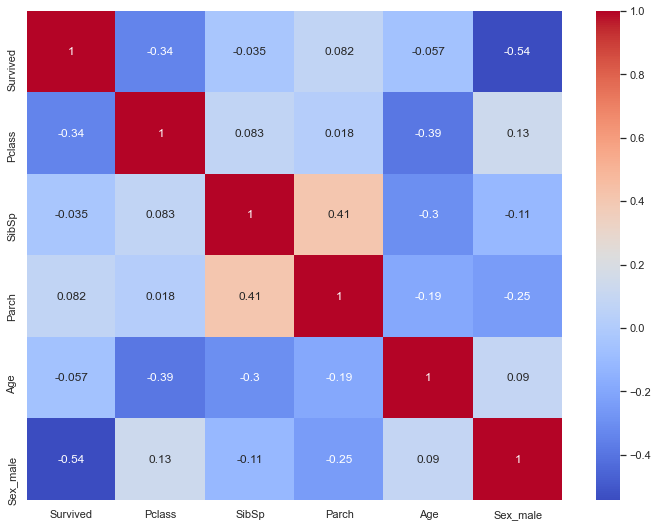

In [36]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),
            cmap="coolwarm",
            annot = True)

**Noteworthy details:**

 * Sex has the strongest correlation to survival
 * Parent/Child, Passenger Class, and Sibling/Spouse are next, but lack strong correlation factors, positive or negative. Even so, they can have great importance in our future models.

**Now we define the independent variables/features:**

In [37]:
X = df.iloc[:,1:]
X.head(3)

,Pclass,SibSp,Parch,Age,Sex_male
0,3,1,0,22.0,1
1,1,1,0,38.0,0
2,3,0,0,26.0,0


**And the target variable:**

In [38]:
y = df['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

**After which we split the data:**

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y, 
                                                test_size=.20, 
                                                random_state=1)

In [40]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((712, 5), (179, 5), (712,), (179,))

As depicted above in the 'test_size' argument, the test size is 20% the size of the full dataset.

## 2. The Model

### 2.1. Logistic Regression

**We define the model and fit it:**

In [66]:
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)

LogisticRegression()

**Make our predictions(on both train and test datasets):**

In [72]:
ypred_train = pd.DataFrame(lr.predict(Xtrain))
ypred_train.head(3)

,0
0,0.0
1,1.0
2,1.0


In [80]:
ypred_test = pd.DataFrame(lr.predict(Xtest))
ypred_test.head(3)

,0
0,1.0
1,0.0
2,1.0


In [81]:
ypred_full = pd.DataFrame(lr.predict(X))
ypred_full.head(3)

,0
0,0.0
1,1.0
2,1.0


**And check the scores:**

In [64]:
lr.score(Xtrain,ytrain)

0.8089887640449438

In [65]:
lr.score(Xtest,ytest)

0.8156424581005587

**The result of this test (80.89% accuracy on training data & 81.56% on test data) is decent, given the fact that it is one of the simplest models, and the data is not fully feature engineered. Also the small difference between the 2 scores show us that the model is not under- or overfitted.**

**Confusion Matrix**

<Figure size 360x360 with 0 Axes>

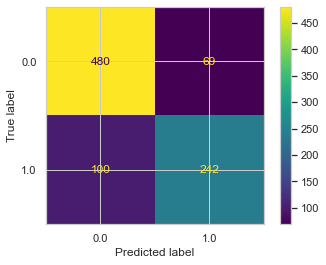

In [85]:
conf = confusion_matrix(y,ypred_full)
plt.figure(figsize=(5,5))
plot_confusion_matrix(lr, X, y, normalize=None)

In [105]:
cross_validation_lr = cross_val_score(estimator=m,
                                      X=Xtrain,
                                      y=ytrain,
                                      scoring='accuracy',
                                      cv=10,
                                      verbose=5)
print(f'\nValidation accuracy scores: {np.round(cross_validation_lr,2)}')
print(f'\nMean: {cross_validation_lr.mean():.2}')
print(f'\nStD: {cross_validation_lr.std():.2}\n')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.736, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.806, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.761, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.831, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.845, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.789, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.817, total=   0.1s
[CV]  

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.845, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.0s

Validation accuracy scores: [0.74 0.81 0.76 0.83 0.85 0.79 0.82 0.82 0.85 0.75]

Mean: 0.8

StD: 0.038



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


**The cross validation is reconfirming us that the model is neither under- or overfitted by giving us a mean of validation accuracy scores very close to our actual test scores.**